# PROSPER DATA EXPLORATORY ANALYSIS

### by Okoh Victor

## Preliminary Wrangling

**Structure of dataset** 

This data set contains 113,937 loans with 81 variables on each loan, including loan amount (demand for credit), borrower rate (or interest rate), estimated returns( on loans), current loan status, borrower income, and many others. Categories first include Borrower information: Basic attributes of the borrowers such as annual income, condition of employment, interest rate, loan status, etc. While the second category include Loan performance information: Metrics evaluating the risk associated with the loans such as Prosper score and bank card utilization, etc

[Source of the data](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000)

[See this data dictionary to understand the dataset's variables](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000)

**Research Questions**

1. Do intrest rate really matter in determining loan repayment and demand for credit?

2. What is the effect of intrest rate on demand for loans?

3. Which factors are influencing effective loan repayment?

4. 

## Reading and Accessing data

In [1]:
# import all packages and libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

%config InlineBbackend.figure_format='retina'



In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# this returns the first fIVE lines in our dataframe
loan_df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
#this returns the last five lines in our dataframe
loan_df.tail(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
# display random rows to get better understanding of the dataset and errors present
loan_df.sample(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
106709,CF99355264361776935E837,608547,2012-07-07 16:24:22.190000000,NaN,12,Completed,2013-05-24 00:00:00,0.07982,0.0704,0.0604,...,-25.62,0.0,0.0,0.0,0.0,1.0,0,0,0.0,106
82521,C76535840240755538C8491,835787,2013-07-11 16:23:39.053000000,NaN,36,Current,NaN,0.20053,0.1639,0.1539,...,-93.51,0.0,0.0,0.0,0.0,1.0,0,0,0.0,125


In [6]:
# This returns a tuple of the dimensions of the dataframe
loan_df.shape

(113937, 81)

In [7]:
# display information about the original dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## Data Wrangling

In [8]:
# this returns the datatypes of the columns
loan_df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [9]:
# see number of duplicated data entries
sum(loan_df.duplicated()) 

0

In [10]:
# see number of null values on each columns
loan_df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [11]:
# list of colums
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

Next, I pick only the columns I'll need for my exploratory analysis

In [12]:
# Select the columns I need for my analysis

Var = ['BorrowerAPR', 'LoanOriginalAmount','EstimatedReturn','DebtToIncomeRatio','StatedMonthlyIncome',
       'MonthlyLoanPayment','LoanStatus','ProsperRating (Alpha)', 'Term','ListingCreationDate','IsBorrowerHomeowner',
       'Occupation', 'EmploymentStatus','EmploymentStatusDuration','IncomeRange',]

In [13]:
# New subdataset
loan_data = loan_df[Var]
loan_data.head()

,BorrowerAPR,LoanOriginalAmount,EstimatedReturn,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,LoanStatus,ProsperRating (Alpha),Term,ListingCreationDate,IsBorrowerHomeowner,Occupation,EmploymentStatus,EmploymentStatusDuration,IncomeRange
0,0.16516,9425,NaN,0.17,3083.333333,330.43,Completed,NaN,36,2007-08-26 19:09:29.263000000,True,Other,Self-employed,2.0,"$25,000-49,999"
1,0.12016,10000,0.05470,0.18,6125.000000,318.93,Current,A,36,2014-02-27 08:28:07.900000000,False,Professional,Employed,44.0,"$50,000-74,999"
2,0.28269,3001,NaN,0.06,2083.333333,123.32,Completed,NaN,36,2007-01-05 15:00:47.090000000,False,Other,Not available,NaN,Not displayed
3,0.12528,10000,0.06000,0.15,2875.000000,321.45,Current,A,36,2012-10-22 11:02:35.010000000,True,Skilled Labor,Employed,113.0,"$25,000-49,999"
4,0.24614,15000,0.09066,0.26,9583.333333,563.97,Current,D,36,2013-09-14 18:38:39.097000000,True,Executive,Employed,44.0,"$100,000+"


In [14]:
categoric_vars = ['EmploymentStatus','IsBorrowerHomeowner','Term', 'ProsperRating (Alpha)',
                   'LoanStatus']

In [15]:
# Numerical features
numeric_vars = ['BorrowerAPR','EmploymentStatusDuration','EstimatedReturn','DebtToIncomeRatio',
                'StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']

## Data Cleaning

In [16]:
# Convert 'ListingCreationDate' to datetime 
loan_data['ListingCreationDate'] = pd.to_datetime(loan_data['ListingCreationDate'])

In [17]:
# Extract year information 
loan_data['year']= loan_data['ListingCreationDate'].dt.year

In [18]:
# Drop unused column
loan_data.drop(['ListingCreationDate'], axis=1, inplace=True)

In [19]:
# confirm if listingcreationdate has been dropped
loan_data.sample()

,BorrowerAPR,LoanOriginalAmount,EstimatedReturn,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,LoanStatus,ProsperRating (Alpha),Term,IsBorrowerHomeowner,Occupation,EmploymentStatus,EmploymentStatusDuration,IncomeRange,year
80857,0.11194,3500,NaN,0.13,6958.333333,113.76,Completed,NaN,36,False,NaN,NaN,NaN,Not displayed,2006


In [20]:
loan_data.describe()

,BorrowerAPR,LoanOriginalAmount,EstimatedReturn,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,Term,EmploymentStatusDuration,year
count,113912.000000,113937.00000,84853.000000,105383.000000,1.139370e+05,113937.000000,113937.000000,106312.000000,113937.000000
mean,0.218828,8337.01385,0.096068,0.275947,5.608026e+03,272.475783,40.830248,96.071582,2011.012481
std,0.080364,6245.80058,0.030403,0.551759,7.478497e+03,192.697812,10.436212,94.480605,2.504353
min,0.006530,1000.00000,-0.182700,0.000000,0.000000e+00,0.000000,12.000000,0.000000,2005.000000
25%,0.156290,4000.00000,0.074080,0.140000,3.200333e+03,131.620000,36.000000,26.000000,2008.000000
50%,0.209760,6500.00000,0.091700,0.220000,4.666667e+03,217.740000,36.000000,67.000000,2012.000000
75%,0.283810,12000.00000,0.116600,0.320000,6.825000e+03,371.580000,36.000000,137.000000,2013.000000
max,0.512290,35000.00000,0.283700,10.010000,1.750003e+06,2251.510000,60.000000,755.000000,2014.000000


### What is the structure of your dataset?

There are 113937 loans with 81 unique features explaining the diverse aspect of getting loan. Some of the features include the borrowerAPR, Loan original amount, term of loan, employment status and so on. Most of the variables fit into the categroical and numerical description. 

Note that the dataset was reduced into 14 variables that fits into this analysis 


### What is/are the main feature(s) of interest in your dataset?

The main aim of this study is to find the effect of intrest rate on loan repayment and on demand of loans. 

The research questions include the following: 

1. Do intrest rate really matter in determining loan repayment and demand for credit?

2. What is the effect of intrest rate on demand for loans?

3. Which factors are influencing effective loan repayment?

BorrowerAPR is used in proxy for intrest rate in this study while monthlyloanpayment is used as a proxy for loan repayment and loanamount is used to represent the demand for credit 

**I expect BorrowerAPR will have a negative effect on demand for credit. The higher the BorrowerAPR to be specific, are often associated with low demand or appetite for credit. Moreover, it is also believed to negatively affect loan repayment amongst borrowers. The aim of the study was to determine whether the BorrowerAPR leads to low demand for credit amongst Prosper loan clients.**

###  What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- LoanOriginalAmount: The original amount loan is used to illustrate or show the demand for credit 
- MonthlyLoanPayment: This would be used to show monthly payment and in effect loan repayment 
- EstimatedReturn: For an individual to be able to repay its loan effectively, it requires an assured or strong estimated profits on the loan.
- DebtToIncomeRatio: This is the % of your gross monthly income that goes to paying your monthly debt payments and is used to determine borrowing risk. A low ratio indicates sufficient income relative to debt servicing and it makes a borrower more attractive. 
- StatedMonthlyIncome: This is needed to show that a borrower have means to repay a new loan 
- Term: This is considered to be the time between when the loan was disbursed to the loan applicant and when the first installment is paid
- IsBorrowerHomeowner: Home of a borrower can be used as a collateral or pledge to access loans. This would improve the chances of getting loans
- EmploymentStatus: Getting a loan without a job is not known to be easy. Depending on the type and volume of your business and work, there is a limit to how much you can take from the bank as a loan. An employed loan seeker with good work experience of borrowers will lead to quick approval of their personal loan applications from lenders.
- Occupation: While it’s uncommon for lenders to list certain industries as ineligible for a personal loan, what you do for a living can affect your eligibility. That’s because some occupations have a higher rate of default than others. Investors lost the most money when funding loans to individuals from the certain occupations 
- ProsperRating: The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
- IncomeRange: The income range of the borrower at the time the listing was created.
- LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted. The loan status contains the list of non-performing loans (defaulted)


## Univariate Exploration

I would basically be investigating the distribution of individual variables

First, I will begin with the distribution of the main variable of intrest. How is borrowerAPR distributed?

### BorrowerAPR

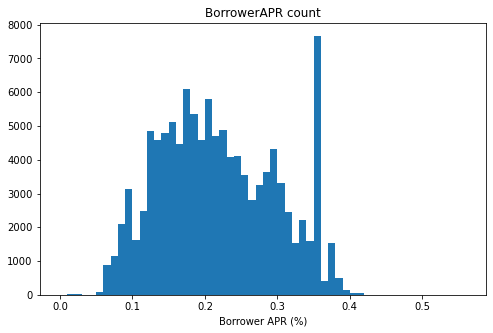

In [21]:
# standard-scaled Borrower APR plot
bins = np.arange(0, loan_data.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_data, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('Borrower APR (%)');

In [22]:
loan_data.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

**Observation**

The mean APR is 0.218828(or 21.88%) and the median(50%) is 0.209760(or 20.976%). These two values
are less than 0.1 apart, so either value is reasonable. We can also see from the output that there is an APR of 0.512290 which is the highest value. From the graph above, the maximum APR has the least counts of loans while lower rates carries a high counts of loans. Generally, borrowers tend to prefer APR with the lowest as this would make repayment more easier

Also, the distribution of APR looks multimodal.This is because of the multiple maxima values found in the graph

**Next, I want to see how the distribution of loan based on status**

## Loan Status

In [23]:
# Order the categorical variable 
status_counts = loan_data.LoanStatus.value_counts()
status_order = status_counts.index

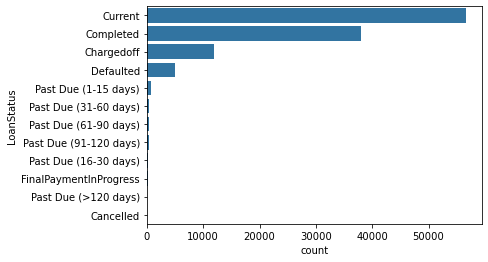

In [24]:
# visualize loan status
base_color = sb.color_palette()[0]
# Plot the bar charts 
sb.countplot(data=loan_data, y='LoanStatus', order=status_order, color=base_color);

**OBSERVATION**

The above bar charts shows that majority of the loan are listed as current while default loans and loans past due are the least but still tangible. The essence of this analysis is to determine the reasons why certain loans are defaulted while others are completed. 

### What is the distribution of Estimated Returns?

## Estimated Return

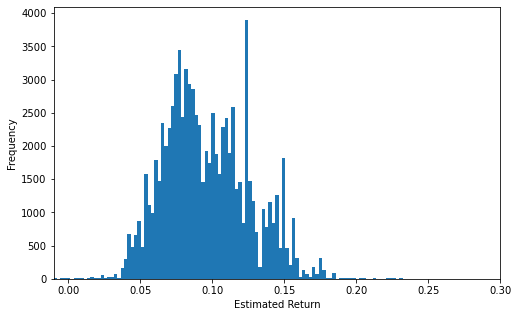

In [25]:
# graphical representation
plt.figure(figsize = [8,5])
plt.xlim(-0.01, 0.3)
plt.hist(loan_data.EstimatedReturn,  bins = 200)
plt.xlabel('Estimated Return')
plt.ylabel('Frequency');

In [26]:
loan_data.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

**OBSERVATION**

It is important to understand that estimated returns ploted above is for the loans after 2019. Estimated returns refers to the approximated financial profit or gain a loan would generate. From the graph we can see that the distribution also appears multimodal with the mean of the estimated returns amounting to 0.096(9%) with the least estimated returns being a loss of 18.27% and a maxium returns possible being 28.37% returns on loan. Failure to adhere to loan repayment schedules as
demanded by the financial institutions might be due to low profits or total losses in other cases that the business enterprises obtained

**Next, I will find the demand of credit using the loan amount as a proxy variable**

### Loan Original Amount

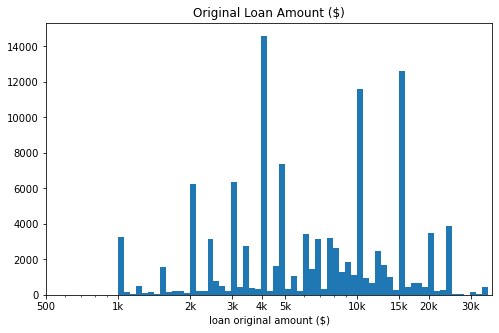

In [27]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2, np.log10(loan_data['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500,1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000], ['500','1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k'])
plt.xlim((500,37000))
plt.xlabel('loan original amount ($)')
plt.title('Original Loan Amount ($)')
plt.show()


In [28]:
loan_data.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

**OBSERVATION**

The graph above shows the distribution of loanoriginalamount which is the principal amount taken out as loans. 

Loan original amount has a long-tailed distribution, with a mean value of 8k. When plotted on a log-scale, the price distribution looks roughly multimodal, with the peak values of 4k, 10k, & 15k. Interestingly, there's a steep jump in frequency right before 2000, rather than a smooth ramp up. Whether high interest rates translate to low demand for loan or loan amount would be decided upon subsequently in the study

Given we have considered the borrowerAPR, Loan status to indentify the defaulted loans. We've also looked at the demand for loan using the loanoriginalamount variables, **next we considere the distribution monthly loan payment.**

## Monthly Loan Payment

In [29]:
loan_data.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [30]:
loan_data.MonthlyLoanPayment.value_counts()

173.71    2423
0.00       935
172.76     536
86.85      472
174.20     460
          ... 
438.53       1
963.83       1
861.13       1
210.18       1
120.67       1
Name: MonthlyLoanPayment, Length: 23567, dtype: int64

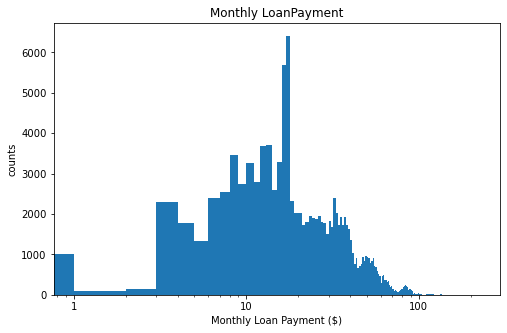

In [31]:
# standard-scaled Borrower Monthly Loan Payment
bins = np.arange(0, loan_data.MonthlyLoanPayment.max()+10, 10)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_data, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([1e1, 1e2,  1e3], ['1', '10', '100'])
plt.title('Monthly LoanPayment')
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('counts');



**OBSERVATION**

The monthly loan payment which shows to the ability to repay loans at a monthly basis follows a normal distribution when plotted on a log-scale. From the value counts, we could see that the mean monthly loan payment is $272 while the peak is at 173. From the bivariate analysis, we would study the factors affecting repayment ability

### What is the distribution of Debt-to-Income Ratio?

## Debt to Income

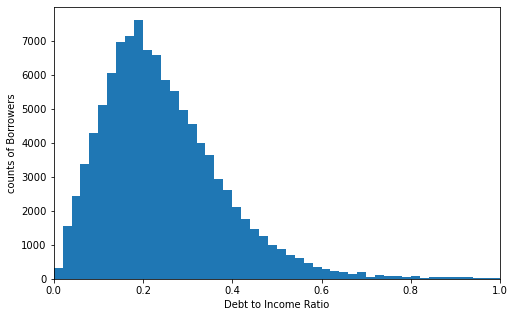

In [32]:
# Distribution of the debt to income distribution
binsize = 0.02
bins = np.arange(0, loan_data['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data[loan_data['DebtToIncomeRatio'].notnull()], x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('counts of Borrowers')
plt.xlim(0,1.0);

**OBSERVATION** 

The debt to income(DTI) distribution exhibit positive skewness with the DTI ratio of 0.2 having the highest number of loans. In general, higher Debt To Income Ratio demonstrates that an individual has too much debt for the amount of income. Inversely, lower DebtToIncomeRatio means a good balance between debt and income. It appears from the figure above that most borrowers who applied for a loan have a debt to income ratio around 30%. A good rule of thumb is to keep the debt-to-income ratio below 36 percent. This will increase your chances of getting a loan and also being able to repay loans. As default on loans mostly occurs on those with high debt to income ratio. 


### What is the most common employment status of loan seekers?

## Employment Status

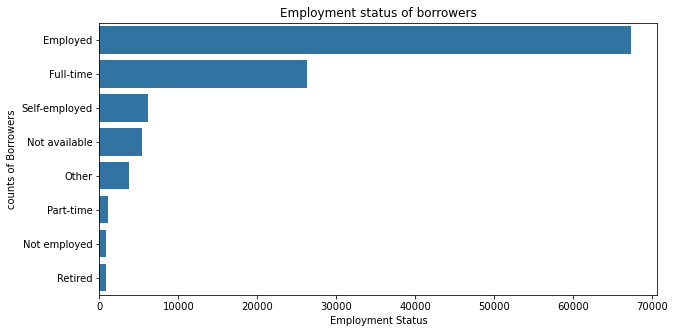

In [33]:
# Employment status bar charts 

plt.figure(figsize=[10, 5])

base_color = sb.color_palette()[0]
employ_order = loan_data['EmploymentStatus'].value_counts().index

sb.countplot(data = loan_data, y ='EmploymentStatus', color = base_color, order = employ_order)

# Labelling off axes
plt.xlabel('Employment Status')
plt.ylabel('counts of Borrowers')
plt.title('Employment status of borrowers');

**OBSERVATION**

The majority of borrowers are employed, which makes sense. Getting a loan without a job is not known to be easy. Depending on the type and volume of your business and work, there is a limit to how much you can take from the bank as a loan. An employed loan seeker with good work experience of borrowers will lead to quick approval of their personal loan applications from lenders.

An employed a person is, the easier it will be to repay bank loan. While borrowers who are retired, unemployed, underemployed(part-time) are likely to default. It is also important to know how long a borrower has been employed


### So most of the loan seekers are employed, how long have they been employed?

## Employment Status Duration

In [34]:
loan_data['EmploymentStatusDuration'].describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

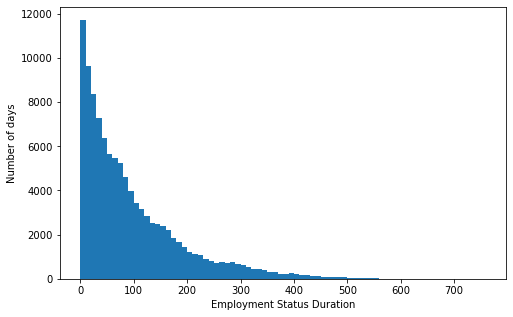

In [35]:
# Distribution of the debt to income distribution
binsize = 10
bins = np.arange(0, loan_data['EmploymentStatusDuration'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_data[loan_data['EmploymentStatusDuration'].notnull()], x = 'EmploymentStatusDuration', bins = bins)
plt.xlabel('Employment Status Duration')
plt.ylabel('Number of days');

**OBSERVATION**

The mean employment status duration happens to be between around 96 days which is equivalent of 3 months. A borrower with a long employment status duration in a good status is more likely of getting loans and also repaying of loans. Next, we find the occupation of majority of the borrowers

### What is the occupation of the loan seekers?

## Occupation

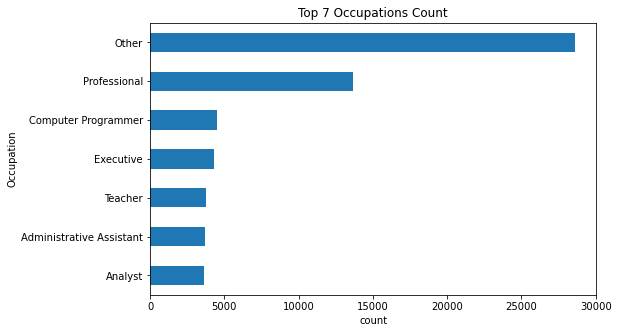

In [36]:
# see the top 10 occupations of borrowers
plt.figure(figsize=[8, 5])
loan_data['Occupation'].value_counts()[6::-1].plot(kind='barh')
plt.title('Top 7 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 12


**OBSERVATION**

Top 7 Occupations Count: most borrowers enter their occupations as "others" or "professional" because they might not want to share this information. That notwithstanding, a professional borrower is most likely to get loans as well other white collar occupation such as Executive, Computer programmer and Analyst.

While it’s uncommon for lenders to list certain industries as ineligible for a personal loan, what you do for a living can affect your eligibility. That’s because some occupations have a higher rate of default than others. Investors lost the most money when funding loans to individuals from the certain occupations 

**Next, we try to see the income range of the borrower**

## Income Range

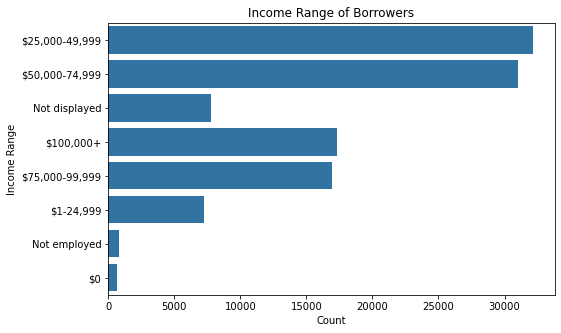

In [37]:
# Income Range bar charts
base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.countplot(data = loan_data, y = 'IncomeRange', color = base_color)
plt.ylabel('Income Range')
plt.xlabel('Count')
plt.title('Income Range of Borrowers');

**OBSERVATION**

The higher your income, the more eligible you are on accessing bank loan. Most borrowers are within the income bracket of 25k to 49k and almost same frequencies are around 50k to 74k. This shows that most of the borrowers are low income earners with a few rich income earners. 


### How the does Prosper Rating measure up in terms of loan distribution?

## Prosper Rating

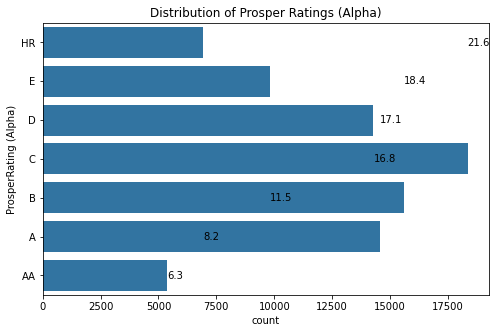

In [38]:
# Steps to print the text (proportion) on the bars
# List the ratings in an accending level of siginificance 
rating_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = rating_order)
loan_data['ProsperRating (Alpha)'] = loan_data['ProsperRating (Alpha)'].astype(ordered_var)

base_color = sb.color_palette()[0]
n_loans = loan_data['ProsperRating (Alpha)'].value_counts().sum()
plt.figure(figsize = [8, 5])
sb.countplot(data=loan_data, y='ProsperRating (Alpha)', color=base_color)
plt.title('Distribution of Prosper Ratings (Alpha)')
rating_counts = loan_data['ProsperRating (Alpha)'].value_counts();

# Logic to print the proportion text on the bars
for i in range (rating_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = rating_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_loans)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

**OBSERVATION**

Credit ratings is an evaluation of the credit risk of a prsopercive debtor in terms of predicting their ability to pay back the debt and implicit forcast of the likelihood of the debtor defaulting. The highest frequency comes from a  C prosper rating with the least 6.1%. Higher grades are intended to represent a lower probability of default. 


### How long do most loans stays for?

## Term of Loans

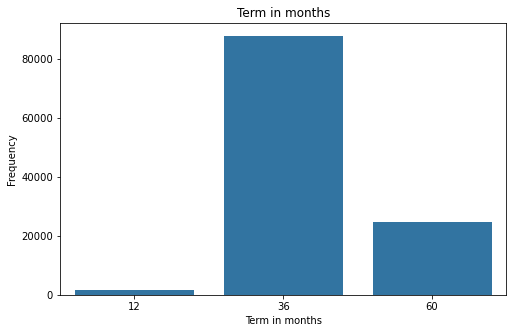

In [39]:
# Plot term of loans

base_color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.countplot(data = loan_data, x = 'Term', color=base_color)
plt.ylabel('Frequency')
plt.xlabel('Term in months')
plt.title('Term in months');

**OBSERVATION** 

We have short term loans: 1 year, Medium term loans 3 and 5 years. The most common type is a 3-year loan (medium term) followed by 5 year loan. The short term loan is very rare. Most personal loans are within 3 to 5 years, which implies that majority of the loan in this case are personal loans. 

## How many loan seekers has collateral?

## IsBorrowerHomeowner

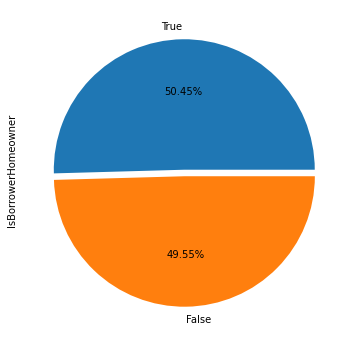

In [40]:
# Collateral Possession Charts

loan_data['IsBorrowerHomeowner'].value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()


**OBSERVATION** 

A simple majority(52.85%) of the applicants are homeowners. Also, priori research suggest that movable assets increase the likelihood that borrowers perceived to be less creditworthy will obtain loans from informal sources and repay them

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The mean APR is 0.218828(or 21.88%) and the median(50%) is 0.209760(or 20.976%). These two values
are less than 0.1 apart, so either value is reasonable. We can also see from the output that there is an APR of 0.512290 which is the highest value. Also, the distribution of APR looks multimodal.This is due to the presence of multiple maxima values found.

For the estimated returns dataset, it was observed that the data began counting from 2019. This is quite limiting as it failed to capture the pre 2009 returns.  It is also observed that the distribution appears multimodal with the mean of the estimated returns amounting to 0.096(9%) with the least estimated returns being a loss of 18.27% and a maxium returns possible being 28.37% returns on loan. 

The highest frequency comes from a  C prosper rating with the least 6.1%. Higher grades are intended to represent a lower probability of default. 

Also, without trasformation, the loanoriginalamount has a long-tailed distribution, with a mean value of 8k. When plotted on a log-scale, the price distribution looks roughly multimodal, with the peak values of 4k, 10k, & 15k. 

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

After investigating the dataset, it was observed that all the dataset follows a normal distribution curve aside EmploymentStatusDuration whic follows a right skewed distribution. Relative frequency was used for the loanstatus dataset with certain dataset being removed  

## Bivariate Exploration

One of the key objective of the study is to study the effect of intrest rate on demand for loans 

In [41]:
Top = ['BorrowerAPR','LoanOriginalAmount']

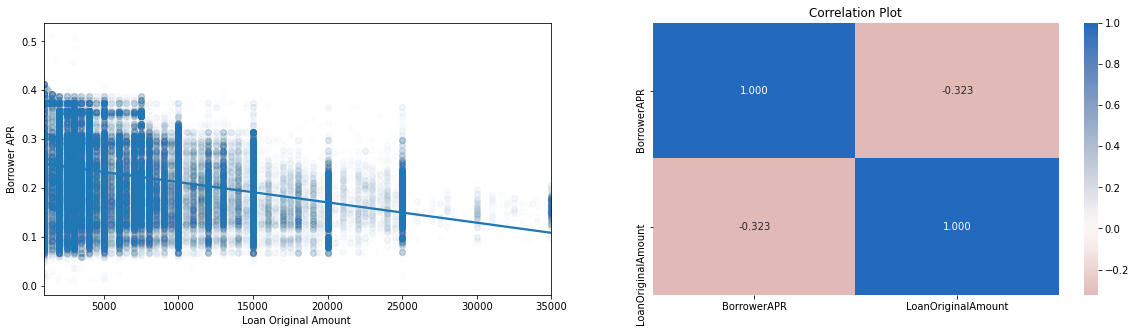

In [42]:
# Relationship between Loan original amount and borrowerAPR
plt.figure(figsize = [20, 5])

# Histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
sb.regplot(data = loan_data, x = "LoanOriginalAmount", y = "BorrowerAPR", scatter_kws={'alpha':0.01});
plt.xlabel("Loan Original Amount ")
plt.ylabel("Borrower APR");


# Histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
# correlation plot
sb.heatmap(loan_data[Top].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show();



This graph established a significant negative  relationship between the interest rate and demand for credit (loanoriginal amount). The negative relationship between the borrower APR and demand for credit is in line with our expectation: increase in interest rates results in increase in cost of capital and therefore decrease in demand for credit. Also correlation coefficient of -0.323% between loanoriginalamount and borrowerAPR is quite low. This indicates that te variation in demand for credit is not generally explained by BorrowerAPR. As it shows a weak relationship.

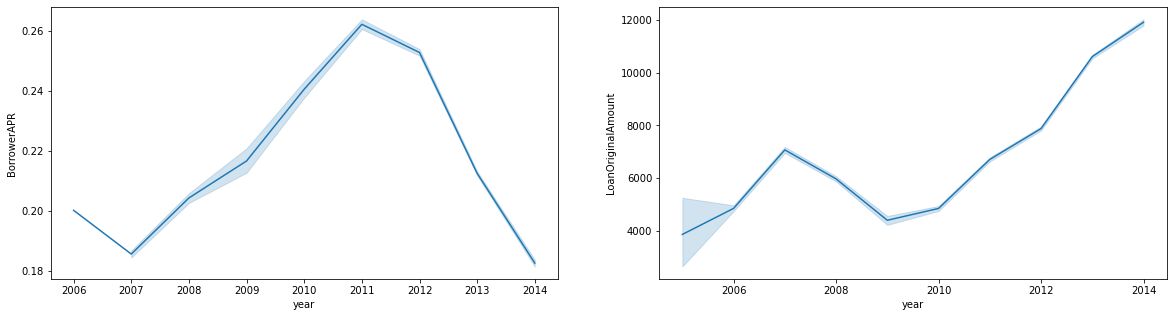

In [43]:
# plots the pointplot for year vs BorrowerRate & Loanoriginalamount
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.lineplot(data=loan_data, x='year', y='BorrowerAPR')

plt.subplot(1, 2, 2)
sb.lineplot(data=loan_data, x='year', y='LoanOriginalAmount');

The figure above shows that the borrower rate increased significantly in 2011 before experiencing a downward trend observed since 2012. While the year 2014 saw the lowest interest rate and still the highest demand for loans. This goes on to show that demand for credit is highest when intrest rate is lowest. Similar occurance happened in 2007 when intrest rate was very low, demand for credit was at it initial peak. 

It is also importat to show the factors affecting efective loan repayment as stated as one of the objec tive for this study. We've already established a negative relationship between borrowerAPR(intrest rate) and loanoriginalamount(demand for credit). The relationship between borrowerAPR and monthlyLoanPayment would be used as proxy to measure the relationship between intrest rate and effective loan payment

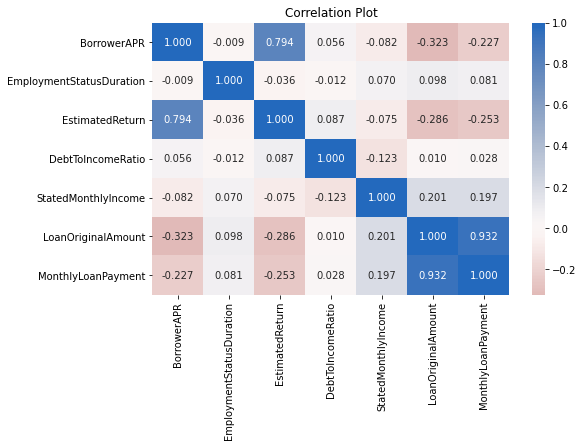

In [44]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

From the correltaion plot above, it shows a negative relationship between intrest rate and effective loan repayment albeit a weak relationshop. This implies that a higher intrest rate would discourage repayment ability to loans. High interest rates discourage business to grow in the sense that a big part of the profit generated goes back to the financial institution to service the loan that was once given to the borrower.

Also to note is the relationship between montlyloanpayment and loan original amount which is showing a strong positive correlation of 93.2%. This is to be expected as the more the demand for the credit, the higher the monthly repayment. 

The relationship between monthlyloanpayment and statedmonthlyincome is also positive as it woudld be easier to repay loans when you are earning income. Same explanation applies to DebtToIncomeRatio as both exhibts positive relationship. 

Also, a longer employment status Duration connotes a higher loan repayment ability.While estimatedreturns results is contrary to the desired result, i appears to be a negative relationship 




loan_data.shape= (113937, 15)
loan_samp.shape= (600, 15)


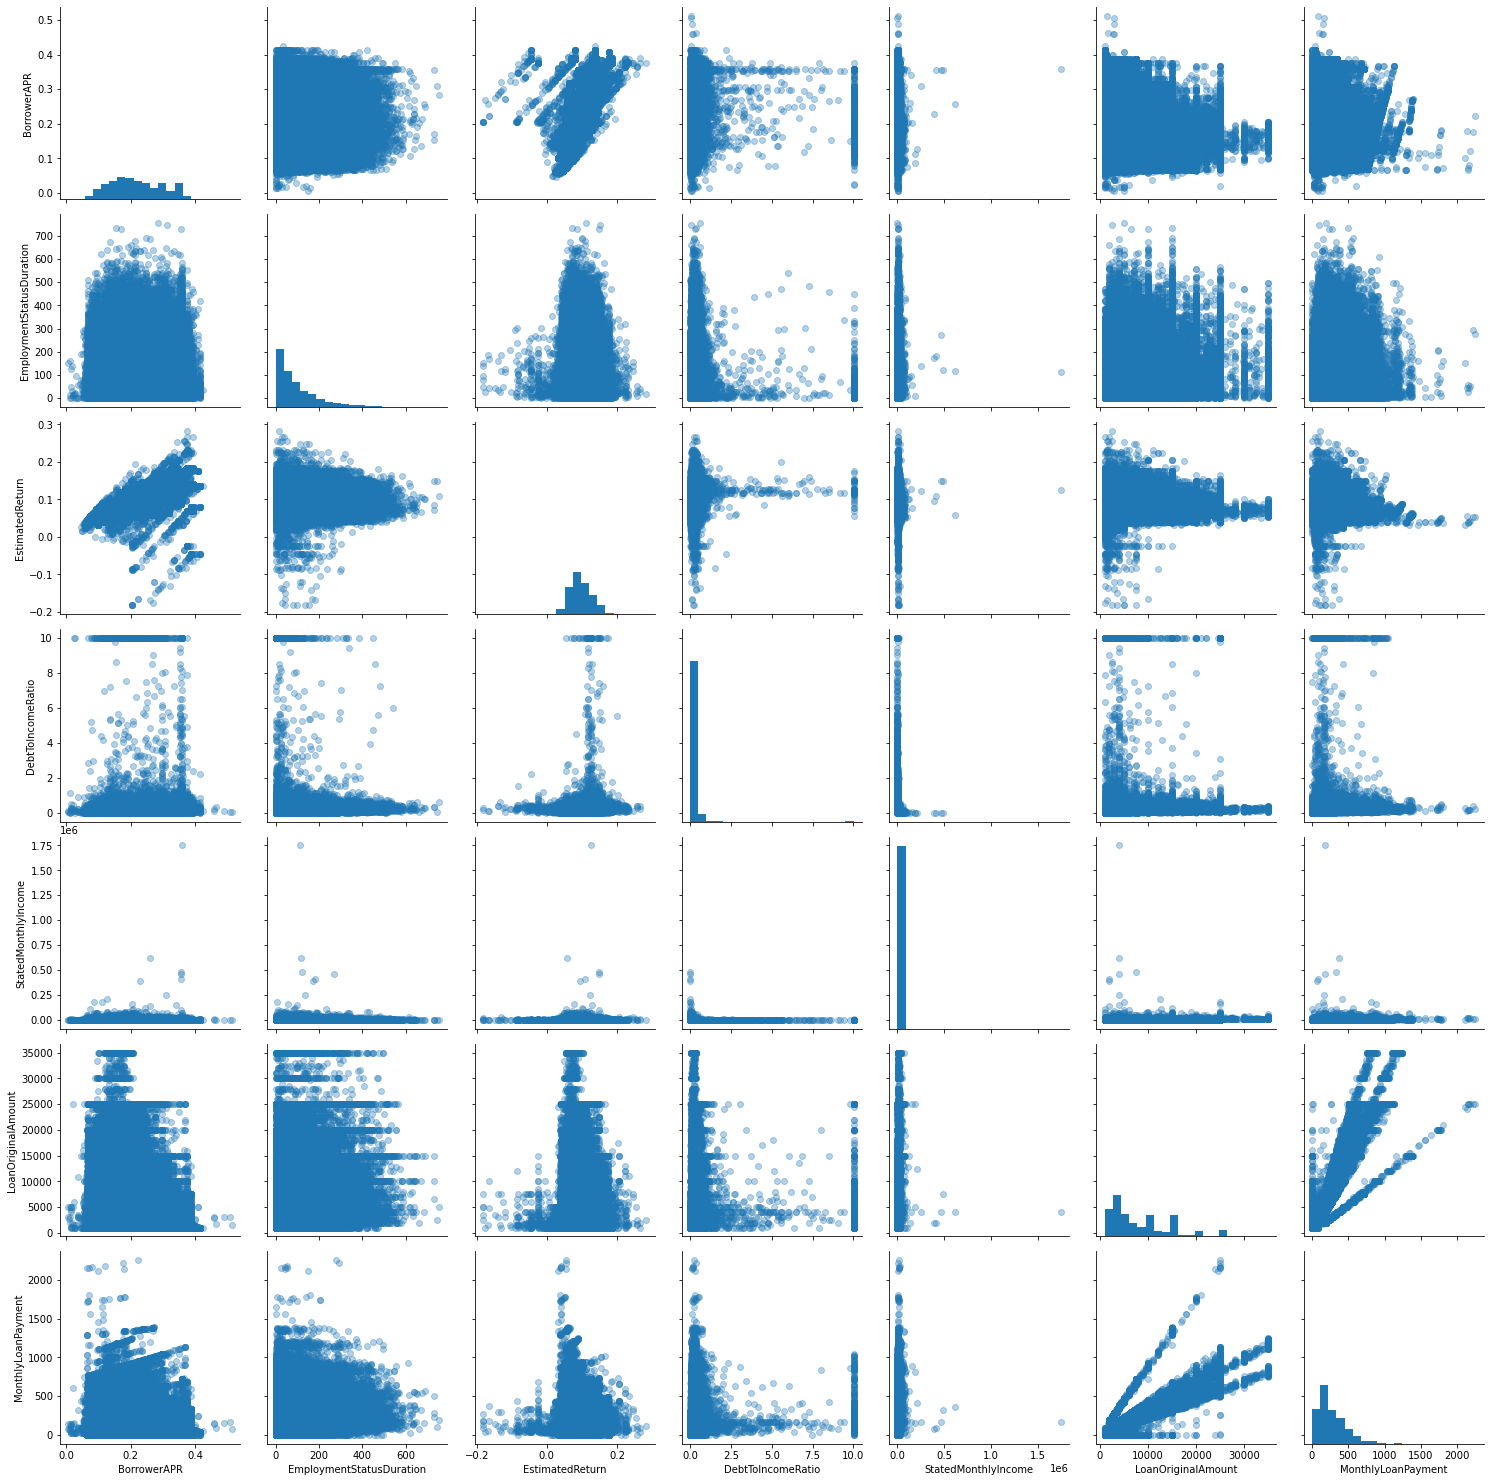

In [45]:
# plot matrix: sample 500 loan so that plots are clearer and they render faster

print("loan_data.shape=",loan_data.shape)
samples = np.random.choice(loan_data.shape[0], 600, replace = False)
loan_samp = loan_data.reindex(samples)
print("loan_samp.shape=",loan_samp.shape)

# pair grid
g = sb.PairGrid(data = loan_data, vars = numeric_vars, size = 3)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter, alpha = 1/3);

**Notes**

From the exploration, it appears that just monthlyloanpayment and loanoriginalamount happens to be highly correlated with one another. This is to be expected as there exist a postive relationship between demand for credit and effective loan repayment. Aside this, majority of the dataset appears to be either a vertical line or a horizontal line. BorrowerAPR and loanoriginalamount don't have strong correlations with any other numeric variables in the dataset, and we see the moderate negative correlation hypothesized as already explained in the previous section

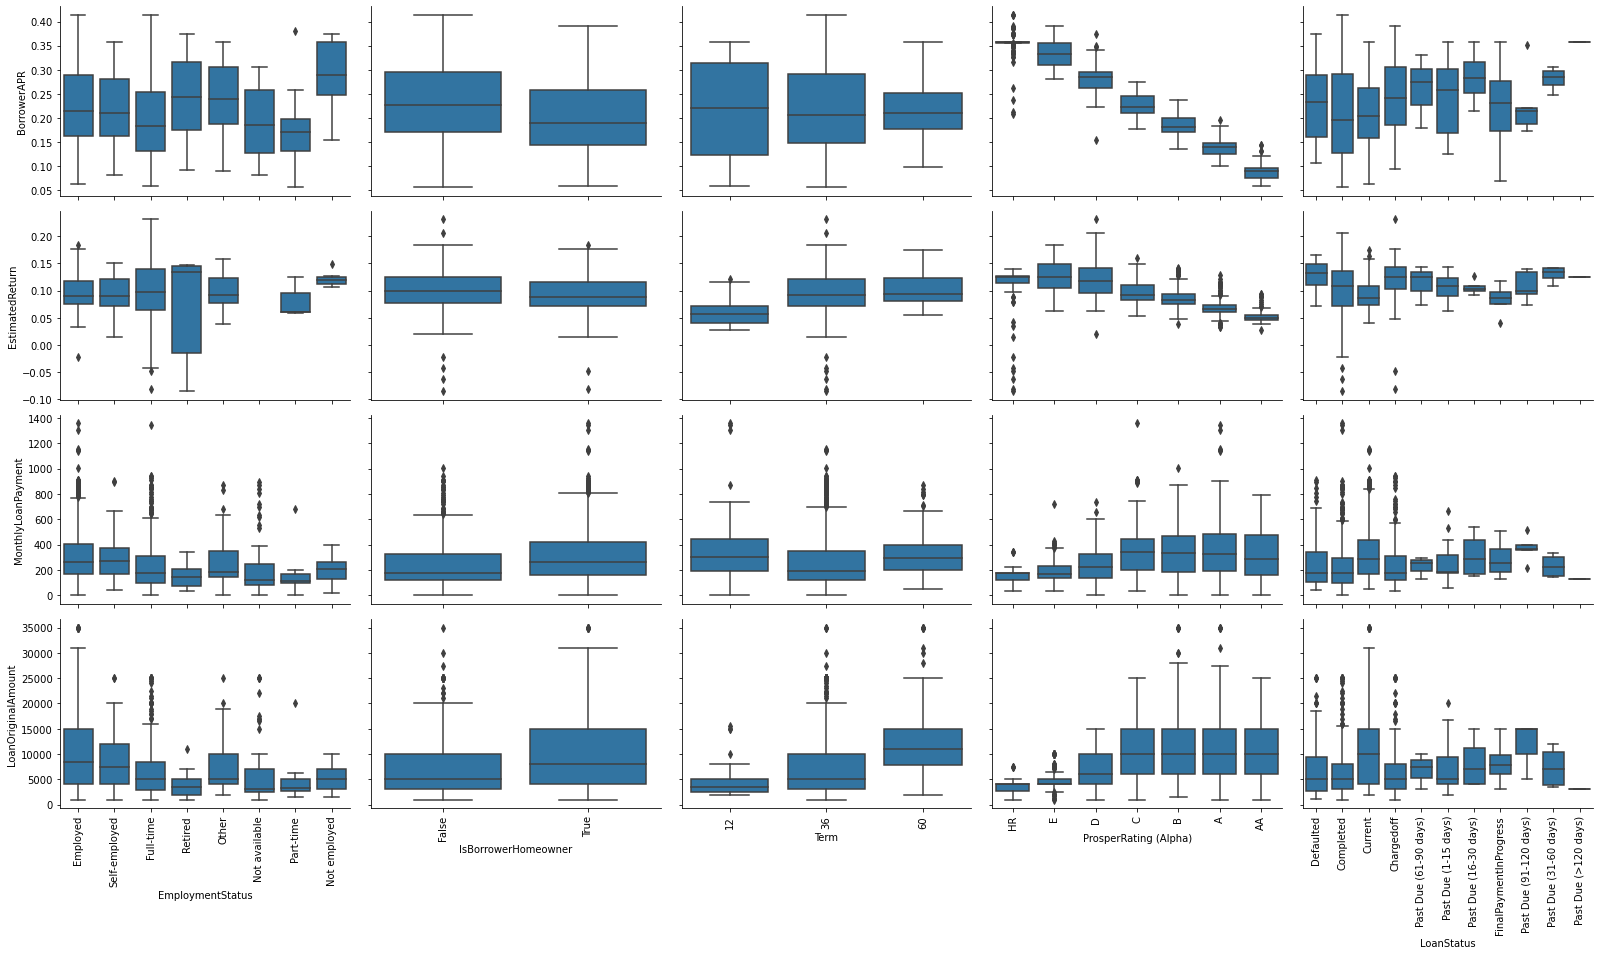

In [46]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

# Deprecated
# samples = np.random.choice(diamonds.shape[0], 2000, replace = False)
# diamonds_samp = diamonds.loc[samples,:]

samp_df = loan_data.sample(2000, replace=False)

#define boxgrid function
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)
    plt.xticks(rotation=90);


g = sb.PairGrid(data = samp_df, y_vars = ['BorrowerAPR', 'EstimatedReturn','MonthlyLoanPayment', 'LoanOriginalAmount'], x_vars = categoric_vars,
                size = 3, aspect = 1.5);
g.map(boxgrid);

**Notes** 

Boxplots are generally used to potray relationship between qualitatvie and quantitative relationship. From the visualtion above illustrates the relationship between the categorical and numeric variables. 

It appears that employed loan seekers are more likely on gtting higher loan amount which indicates thaat demand for credit and a employment status shows a positive relationship. Same can be said for those who are with collateral as loan seekers with a home are most likely on getting loans. Another observation is that borrowers who have collaterals(or homeowners) have lower rates than those who doesn't have any collateral(house). 

Similiarly, term of loans has positive relationship with demand for loans (loanoriginalamount) as loan amount is increased with the increase of loan term. Also, the graph above shows that majority of the defaulted loans from the loanstatus dataset are those with high borrowerAPR rate. 

The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- From the analysis, it was established that a significant negative  relationship between the interest rate and demand for credit (loanoriginal amount) exist. This is in line with our expectation, aalthoug the relationship is quite weak as the correlation coefficient is -0.32%


- Also, it was observed that interest rate (borrower APR) was lowest in 2014 and in 2007 while demand for loans was highest in this same for period. And when interest rate was at it all time high  in 2012, demand for loans was at it lowest. This  shows the inverse relationship between intrest rate and demand for credit  


- Importatntly as well, the correlation plot shows a negative relationship between intrest rate and effective loan repayment This implies that a higher intrest rate would discourage repayment ability to loans. High interest rates discourage business to grow in the sense that a big part of the profit generated goes back to the financial institution to service the loan that was once given to the borrower.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Other intresting relationships found in the study include:
- The positive relationship betweeen longer employment status duration and loan repayment ability (monthlyloanpayment)

- The strong correlation (93.2%) between demand for credit and monthlyloanpayment

- The relationship between monthlyloanpayment and statedmonthlyincome is also positive as it woudld be easier to repay loans when you are earning income. Same explanation applies to DebtToIncomeRatio as both exhibts positive relationship. 

- Estimated returns returns is contrary to expeactations as it reveals a negative relationship with 
monthlyloanpayment 

- It appears that employed loan seekers are more likely on gtting higher loan amount which indicates thaat demand for credit and a employment status shows a positive relationship.

- Same can be said for those who are with collateral as loan seekers with a home are most likely on getting loans. Another observation is that borrowers who have collaterals(or homeowners) have lower rates than those who doesn't have any collateral(house). 

- Similiarly, term of loans has positive relationship with demand for loans (loanoriginalamount) as loan amount is increased with the increase of loan term. Also, the graph above shows that majority of the defaulted loans from the loanstatus dataset are those with high borrowerAPR rate. 

- The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount.


## Multivariate Exploration

Text(0, 0.5, 'Estimated Return')

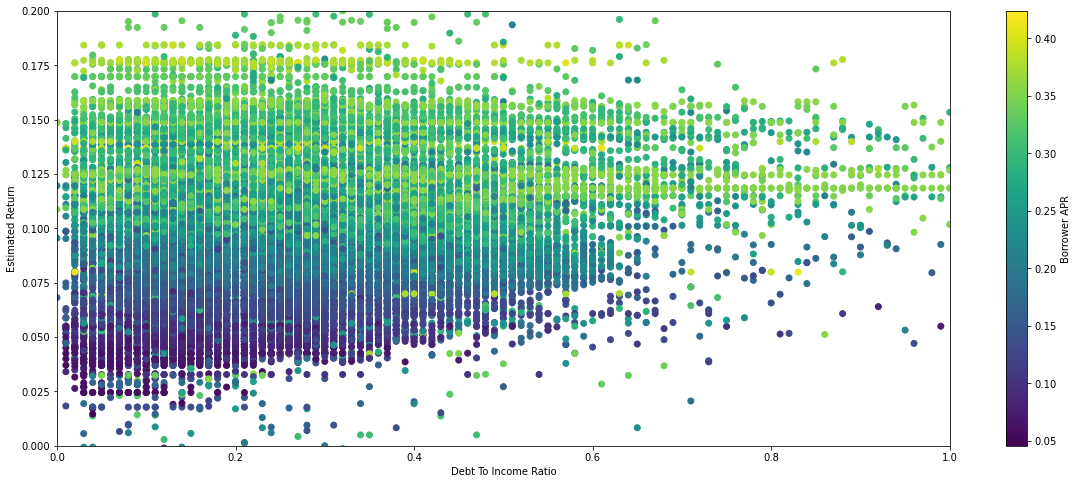

In [47]:
# plotting of scatter plot of debttoincome ratio and estimatedreturn

plt.figure(figsize = [20,8])
plt.scatter(data = loan_data, x = 'DebtToIncomeRatio', y = 'EstimatedReturn', c = 'BorrowerAPR')
plt.colorbar(label = 'Borrower APR')
plt.ylim(0, .2)
plt.xlim(0,1.0)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Estimated Return')

From the visulaization above, it was observed that majorities of the loan given out are of a smaller interest rate as majorities of those rates are below  30%(0.30). Also it was observed that those eligible to receive loans are those with a Debt to Income Ratio below 40% as lenders considers those aboe this threshold to be of a risky investment. Finally, it was observed that estimated return have very litte relationship with borrower APR. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


I extended my investigation of intrest rate (borrowerAPR) against demand for credit(loanoriginalamount) in this section by looking at the impact of the three features. The multivariate exploration here showed that there indeed is a positive effect of a better prosper ratings on  the demand for credit as well as on monthlyloanpayment. I also measured the effect of Term of loans on both relationships. 

Also, it was obsereved that borrower APR has little effect on the relationship between debt to income ratio on estimated returns 

### Were there any interesting or surprising interactions between features?


There was no suprising result aside the relationship of borrower APR to orrower term and prosper rating. A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. 

## Conclusions

>I started of by first getting a detailed understanding of what is expected of me in terms of what I need to do. 

>Then, I imported my data and researched into every variables contained in the dataset so i would get an understanding into the important variables for my study

>I selected the features i would need for my analysis and then I access my data before perfoming a little data cleaning. 

>Next thing I did was to conduct a univariate analysis for my key variables by first asking questions then providing visulization and finally obsrvation on each dataset

>I did the bivariate and multivariate analysis next after that 